In [1]:
import numpy as np
import matplotlib.pyplot as plt


def standarize(x):
    x_mean=x.mean()#平均
    std=x.std() #標準偏差
    return (x-x_mean)/std#標準化

def create_matrix(x_std):# tX*w
    return np.vstack([np.ones(x_std.size),
    x_std,
    x_std**2
    ]).T #.Tが転置

def matrix_f(matrix_x,parameter):#a1*b1+12*b2+a3*b3
    return np.dot(matrix_x,parameter)#numpy.dotは内積（一次）、行列積（多次元）

def matrix_E(matrix_x,y,parameter):#parameterはw0,w1,w2
    return 0.5*np.sum((y-matrix_f(matrix_x,parameter))**2)

def MSE(matrix_x,y,parameter):
    return 1/matrix_x.shape[0]*np.sum((y-matrix_f(matrix_x,parameter))**2)

def polynomial_regression(matrix_x,y):
    parameter=np.random.randint(0,50,3)
    LNR=1e-3#学習率
    defference=1
    count=1#更新回数
    err_before=matrix_E(matrix_x,y,parameter)
    log="({}) parameter:{} error :{:.4f}"
    while defference>1e-2:
        #インデックスをランダム生成(permutationがシャッフル)
        p=np.random.permutation(matrix_x.shape[0])
        #ランダム順に更新
        for tmp_x,tmp_y in zip(matrix_x[p,:],y[p]):
            parameter=parameter - LNR*(matrix_f(tmp_x,parameter)-tmp_y)*tmp_x
        
        #w0,w1,w2を更新する(従来)
        #parameter=parameter-LNR*np.dot(matrix_f(matrix_x,parameter)-y,matrix_x)
         
        #更新後平均二乗誤差で求める
        err_after=MSE(matrix_x,y,parameter)
        
        defference=err_before-err_after
        err_before=err_after
        if count==1 or count%100==0:
            print(log.format(count,parameter,defference))
        count+=1
    print(log.format(count,parameter,defference))
    return parameter




In [2]:
data=np.loadtxt("sales.csv",dtype="int",delimiter=",",skiprows=1)
x=data[:,0]
y=data[:,1]
x_std=standarize(x)
matrix_x=create_matrix(x_std)
parameter=polynomial_regression(matrix_x,y)


(1) parameter:[72.05115381 24.1114648  43.64960314] error :14256433.1365
(100) parameter:[856.64187742 261.11324094 274.328887  ] error :1350.9038
(200) parameter:[1066.99085202  286.23086435  157.9083398 ] error :232.1863
(300) parameter:[1155.65347535  285.24498714  107.34287988] error :42.0967
(400) parameter:[1193.40387516  283.20996637   85.63332592] error :7.6786
(500) parameter:[1209.55779389  282.15159701   76.38163347] error :1.4026
(600) parameter:[1216.43531524  281.63926822   72.39704907] error :0.2649
(700) parameter:[1219.3885211   281.43361512   70.70131966] error :0.0489
(784) parameter:[1220.49604016  281.36571358   70.04810299] error :0.0098


<function matplotlib.pyplot.show(*args, **kw)>

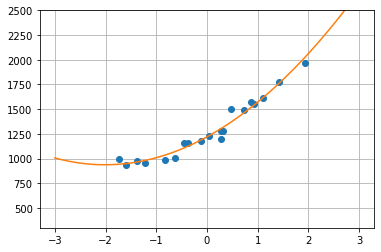

In [3]:
x_axis=np.linspace(start=-3,stop=3,num=100)
plt.ylim(300,2500)
plt.plot(x_std,y,'o')
plt.plot(x_axis,matrix_f(create_matrix(x_axis),parameter))
plt.grid(True)
plt.show